# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

###### The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
#Importing libraries that are needed to carry out the analysis
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV
from time import process_time
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import datetime 
import warnings
warnings.filterwarnings('ignore') #Ignoring warnings

In [5]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [7]:
# Understanding the datatypes in the dataframe to determine what data preprocessing needs to be carried out
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
# Understanding the dataframe to see if there are any null values
A = pd.DataFrame(df.isnull().sum())
A.rename(columns = {0:'Null values'}, inplace = True)
A

,Null values
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [9]:
# Understanding the datatypes in the dataframe to determine what data preprocessing needs to be carried out
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [10]:
# Determining what the features would be in the dataset and what would be the independent (X) variables and the dependent variable (y).
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
X = df[features]
y = df['y']

In [11]:
# Implementing a transformer on the data to one-hot encode the columns that do not have numerical features. This would ensure that these columns can be included in making the final predicitons.  
transformer = make_column_transformer((OneHotEncoder(drop='if_binary'), ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome']),
                                     remainder = StandardScaler())

Text(0.5, 1.0, 'People who subscribed to term deposits')

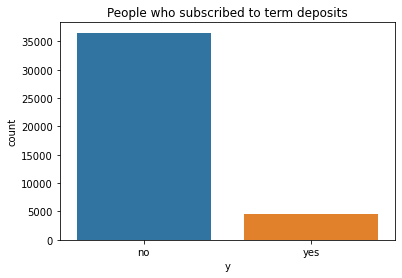

In [11]:
# Plotting the data to get visual confirmation of the data and understanding how this works. 
sns.countplot(data=df, x = 'y')
plt.title('People who subscribed to term deposits')

From the above chart we clearly see that 36,548 individuals (89%) did not subscribe to term deposits whereas only 4,640 individuals did subscribe to the same(11%)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [14]:
# Splitting the data into testing and training databases. The data split is 30% testing data and 70% training data. 
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 22)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In this model we would be trying to achieve the following:

a) Maximize our model accuracy. This would ensure that the model is prediction results appropriately. Given the data is fairly imbalanced (89% yes), I expect most of our models to give high accuracy results. 
b) We will have to balance between precision and recall, since we do not want our predictions just to be precise but we also want to make sure that we use our marketing budget and spend wisely, so that we can have maximum ROI on our ad spend


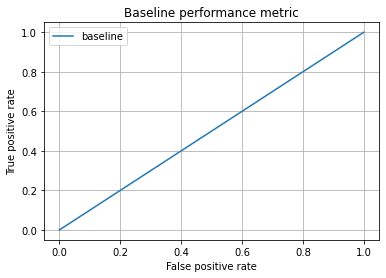

In [35]:
# Creating a base case of the prediction model where the model in essence is guessing.
fig, ax = plt.subplots()
plt.grid()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Baseline performance metric')
plt.legend();

###### The above shows a baseline model wherein the classifier is randomly guessing at the classification and there is no real classification with True positive and False positive rates. This is the baseline model

###### Building a K-nearest neighbors Pipeline

In [12]:
# Building a K-nearest neighbors pipeline
knn_pipe = Pipeline([('transformer', transformer), ('knn', KNeighborsClassifier())])

In [15]:
# Determining the process time it takes for the KNN model to train
start_knn = process_time()
knn_pipe.fit(X_train, y_train)
end_knn = process_time()

In [73]:
# Predicting results from the KNN model.
predictions = knn_pipe.predict(X_test)

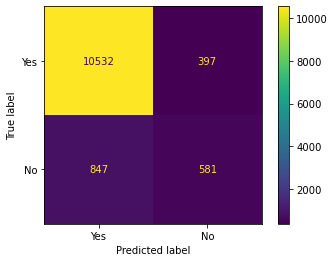

In [74]:
# Building a confusion matrix for the KNN model with the given parameters.
confusion_mat = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['Yes', 'No'])
disp.plot()
plt.show()

The above confusion matrix clearly shows that this model predicted 10,532 true positives, 847 False positives, 397 false negatives and 581 true negatives. This model resulted in a precision score of 0.59 and recall score of 0.41. The calculations are shown below

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

###### Building a Logistic Regression Pipeline

In [20]:
# Building a Logistic Regression  pipeline
lr_pipe = Pipeline([('transformer', transformer), ('lrr',  LogisticRegression())])

In [70]:
# Determining the process time it takes for the Logistic regression model to train
start_lr = process_time()
lr_pipe.fit(X_train, y_train)
end_lr = process_time()

In [71]:
# Predicting results from the Logistic regression model.
predictions_lr = lr_pipe.predict(X_test)

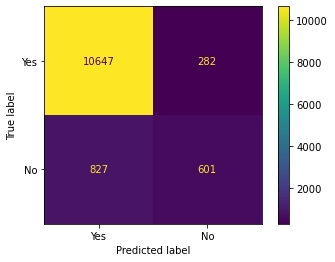

In [75]:
# Building a confusion matrix for the Logistic regression model with the given parameters.
confusion_mat = confusion_matrix(y_test, predictions_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['Yes', 'No'])
disp.plot()
plt.show()

The above confusion matrix clearly shows that this model predicted 10,647 true positives, 827 False positives, 282 false negatives and 601 true negatives. This model resulted in a precision score of 0.68 and recall score of 0.42. The calculations are shown below

###### Building a Decision Tree Pipeline

In [76]:
# Building a Decision Tree pipeline
dt_pipe = Pipeline([('transformer', transformer), ('DT',DecisionTreeClassifier())])

In [77]:
# Determining the process time it takes for the Decision Tree model to train
start_dt = process_time()
dt_pipe.fit(X_train, y_train)
end_dt = process_time()

In [78]:
# Predicting results from the Logistic regression model.
predictions_dt = dt_pipe.predict(X_test)

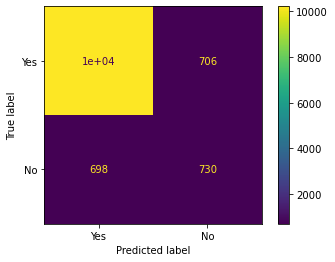

In [79]:
# Building a confusion matrix for the Decision Tree model with the given parameters.
confusion_mat = confusion_matrix(y_test, predictions_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['Yes', 'No'])
disp.plot()
plt.show()

The above confusion matrix clearly shows that this model predicted 10,00 true positives, 698 False positives, 706 false negatives and 730 true negatives. This model resulted in a precision score of 0.50 and recall score of 0.51. The calculations are shown below

###### Building a SVM Pipeline

In [80]:
# Building a SVC pipeline
svc_pipe = Pipeline([('transformer', transformer), ('SVC', SVC())])

In [81]:
# Determining the process time it takes for the SVM model to train
start_svc = process_time()
svc_pipe.fit(X_train, y_train)
end_svc = process_time()

In [82]:
# Predicting results from the SVM model
predictions_svc = svc_pipe.predict(X_test)

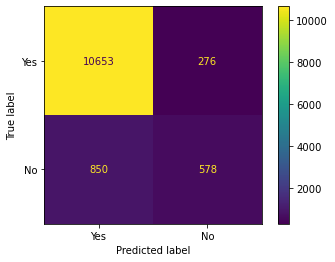

In [83]:
# Building a confusion matrix for the SVM model with the given parameters.
confusion_mat = confusion_matrix(y_test, predictions_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['Yes', 'No'])
disp.plot()
plt.show()

The above confusion matrix clearly shows that this model predicted 10,653 true positives, 850 False positives, 276 false negatives and 578 true negatives. This model resulted in a precision score of 0.67 and recall score of 0.41. The calculations are shown below

### Problem 9: Score the Model

What is the accuracy of your model?

In [142]:
# Determining the precision, accuracy, recall and F1 scores of the Logistic Regression model.
precision_lr = precision_score(y_test, predictions_lr, pos_label = 'yes')
accuracy_lr = accuracy_score(y_test, predictions_lr)
recall_lr = recall_score(y_test, predictions_lr,pos_label = 'yes')
F1_score_lr = f1_score(y_test, predictions_lr, average='weighted')

time_lr = end_lr - start_lr
train_score_lr = lr_pipe.score(X_train, y_train)


print("The precision score is ",precision_lr)
print("The test data accuracy score is ",accuracy_lr)
print("The training data accuracy score is", train_score_lr)
print("The recall score is ",recall_lr)
print("The F1 score is ",F1_score_lr)
print("The training time of logistic regression in seconds is", time_lr, "seconds")

The precision score is  0.6806342015855039
The test data accuracy score is  0.9102532977259853
The training data accuracy score is 0.9120391245534321
The recall score is  0.4208683473389356
The F1 score is  0.9007625145612354
The training time of logistic regression in seconds is 0.640625 seconds


In [141]:
#Determining the precision, accuracy, recall and F1 scores of the knn model.

precision_knn = precision_score(y_test, predictions, pos_label = 'yes')
accuracy_knn = accuracy_score(y_test, predictions)
recall_knn = recall_score(y_test, predictions,pos_label = 'yes')
F1_score_knn = f1_score(y_test, predictions, average='weighted')

time_knn = end_knn - start_knn
train_score_knn = knn_pipe.score(X_train, y_train)

print("The precision score is ",precision_knn)
print("The test data accuracy score is ",accuracy_knn)
print("The training data accuracy score is ",train_score_knn)
print("The recall score is ",recall_knn)
print("The F1 score is ",F1_score_knn)
print("The time of processing time of knn in seconds is", time_knn, "seconds")

The precision score is  0.5940695296523517
The test data accuracy score is  0.8993283159342883
The training data accuracy score is  0.9282369671534113
The recall score is  0.4068627450980392
The F1 score is  0.8909292630677162
The time of processing time of knn in seconds is 0.09375 seconds


In [137]:
#Determining the precision, accuracy and recall scores of the decision tree model.

precision_dt = precision_score(y_test, predictions_dt, pos_label = 'yes')
accuracy_dt = accuracy_score(y_test, predictions_dt)
recall_dt = recall_score(y_test, predictions_dt,pos_label = 'yes')
F1_score_dt = f1_score(y_test, predictions_dt, average='weighted')

time_dt = end_dt - start_dt
train_score_dt = dt_pipe.score(X_train, y_train)

print("The precision score is ",precision_dt)
print("The test data accuracy score is ",accuracy_dt)
print("The training data accuracy score is ",train_score_dt)
print("The recall score is ",recall_dt)
print("The F1 score is ",F1_score_dt)
print("The time of processing time of decision tree in seconds is", time_dt, "seconds")

The precision score is  0.5083565459610028
The test data accuracy score is  0.8863801893663511
The training data accuracy score is  1.0
The recall score is  0.511204481792717
The F1 score is  0.8865180762873776
The time of processing time of decision tree in seconds is 0.390625 seconds


In [136]:
#Determining the precision, accuracy and recall scores of the SVC model.

precision_svc = precision_score(y_test, predictions_svc, pos_label = 'yes')
accuracy_svc = accuracy_score(y_test, predictions_svc)
recall_svc = recall_score(y_test, predictions_svc,pos_label = 'yes')
F1_score_svc = f1_score(y_test, predictions_svc, average='weighted')

time_svc = end_svc - start_svc
train_score_svc = svc_pipe.score(X_train, y_train)

print("The precision score is ",precision_svc)
print("The test data accuracy score is ",accuracy_svc)
print("The training data accuracy score is ",train_score_svc)
print("The recall score is ",recall_svc)
print("The F1 score is ",F1_score_svc)
print("The time of processing time of decision tree in seconds is", time_svc,"seconds")

The precision score is  0.6768149882903981
The test data accuracy score is  0.908877559278142
The training data accuracy score is  0.9227220699941036
The recall score is  0.40476190476190477
The F1 score is  0.89858321580049
The time of processing time of decision tree in seconds is 21.203125 seconds


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [90]:
# Creating a dataframe for carrying out the model comparisons
res_dict= {'model': ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree'],
           'train score': [train_score_knn, train_score_lr, train_score_svc,train_score_dt],
           'test score': [accuracy_knn, accuracy_lr, accuracy_svc,accuracy_dt],
           'average fit time': [time_knn, time_lr, time_svc,time_dt]}
results_df= pd.DataFrame(res_dict).set_index('model')
results_df

,train score,test score,average fit time
model,,,
KNN,0.928237,0.899328,0.093750
Logistic Regression,0.912039,0.910253,0.640625
SVM,0.922722,0.908878,21.203125
Decision Tree,1.000000,0.886380,0.390625


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [256]:
# Determining the correlation of the various inputs to determine if we need to feature engineer
X_train.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.000532,0.004158,-0.031588,0.025432,-0.003417,-0.000498,0.133172,0.008263,-0.022181
duration,0.000532,1.000000,-0.069736,-0.049626,0.023687,-0.031627,0.001126,-0.010331,-0.036522,-0.047357
campaign,0.004158,-0.069736,1.000000,0.049410,-0.078656,0.152573,0.128486,-0.011860,0.136726,0.145511
pdays,-0.031588,-0.049626,0.049410,1.000000,-0.584490,0.268203,0.079479,-0.088775,0.293837,0.368809
previous,0.025432,0.023687,-0.078656,-0.584490,1.000000,-0.419363,-0.207596,-0.051130,-0.452972,-0.498313
emp.var.rate,-0.003417,-0.031627,0.152573,0.268203,-0.419363,1.000000,0.778193,0.187797,0.972272,0.907765
cons.price.idx,-0.000498,0.001126,0.128486,0.079479,-0.207596,0.778193,1.000000,0.051032,0.691639,0.527652
cons.conf.idx,0.133172,-0.010331,-0.011860,-0.088775,-0.051130,0.187797,0.051032,1.000000,0.270775,0.094564
euribor3m,0.008263,-0.036522,0.136726,0.293837,-0.452972,0.972272,0.691639,0.270775,1.000000,0.945393
nr.employed,-0.022181,-0.047357,0.145511,0.368809,-0.498313,0.907765,0.527652,0.094564,0.945393,1.000000


From the above chart we can see that there are certain parameters that are highly correlated and hence can be dropped:

a) emp.var.rate and nr.employed with a correlation of 0.91
b) emp.var.rate and consumer price index with a correlation of 0.91
c) euribor3m and nr.employed with a correlation of 0.94

I have retained all the above the columns for completion of data set, although I could have feature engineered.


###### Using gridsearch parameter for KNN to determine the best parameter and then utilizing that to determine the optimal metric values of precision, recall and accuracy

In [21]:
#Testing parameters between 5 and 25. This is a range I picked to check within. With more compute and time I would go upto len(y_test)
params = {'knn__n_neighbors': range(5,20, 2)}
knn_grid = GridSearchCV(knn_pipe, param_grid=params, cv=5)

In [22]:
# Determining what the optimal neighbors parameter would be for our model
knn_grid.fit(X_train, y_train)
best_k = knn_grid.best_params_['knn__n_neighbors']
best_k

17

In [23]:
#Using the best metric of n_nearest neighbors, building a model to fit the data and determine the best nearest neighbor. 
knn_pipe_optimal = Pipeline([('transformer', transformer), ('knn', KNeighborsClassifier(n_neighbors = best_k))])
knn_pipe_optimal.fit(X_train, y_train)
predictions_knn_opt = knn_pipe_optimal.predict(X_test)

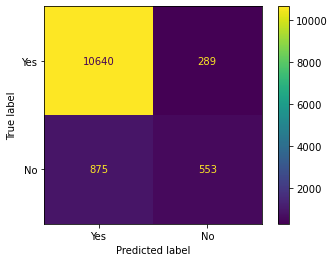

In [95]:
# Plotting a confusion matrix for the optimal parameters.
confusion_mat = confusion_matrix(y_test, predictions_knn_opt)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['Yes', 'No'])
disp.plot()
plt.show()

The above confusion matrix clearly shows that this model predicted 10,640 true positives, 875 False positives, 289 false negatives and 553 true negatives. This model resulted in a precision score of 0.65 and recall score of 0.38. The calculations are shown below

In [135]:
#Determining the precision, accuracy, recall scores and F1 score.

precision_opt = precision_score(y_test, predictions_knn_opt, pos_label = 'yes')
accuracy_opt = accuracy_score(y_test, predictions_knn_opt)
recall_opt = recall_score(y_test, predictions_knn_opt,pos_label = 'yes')
F1_score_opt = f1_score(y_test, predictions_knn_opt, average='weighted')

train_score_knn_opt = knn_pipe_optimal.score(X_train, y_train)


print("The precision score is ",precision_opt)
print("The training accuracy score is ",train_score_knn_opt)
print("The test accuracy score is ",accuracy_opt)
print("The recall score is ",recall_opt)
print("The F1 score is ",F1_score_opt)

The precision score is  0.6567695961995249
The training accuracy score is  0.9149526551281607
The test accuracy score is  0.9058023792182569
The recall score is  0.3872549019607843
The F1 score is  0.8948735546845626


In [98]:
#Determining the thresholds at which classificaiton is occuring
test_predictions = knn_pipe_optimal.predict_proba(X_test)

In [99]:
thresholds = np.arange(0, 1, .1)

In [100]:
#Determining the precision values at various thressholds
def precision_thresh(predict_probs, y_test, thresh):
    preds = np.where(predict_probs >= thresh, 'yes', 'no')
    return precision_score(y_test, preds, pos_label = 'yes')

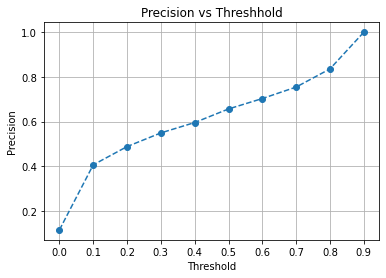

In [101]:
# plotting the various precision and threshhold values
results_df = pd.DataFrame({'threshold': thresholds, 'precision': [precision_thresh(test_predictions[:, 1], y_test, i) for i in thresholds]})
plt.plot(results_df['threshold'], results_df['precision'], '--o', label = 'precision')
plt.xticks(thresholds)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs Threshhold')
plt.grid();

We can clearly see the direct relationship between thresshold and precision. So as thresshold increases, precision increases.

In [102]:
#Determining the recall values at various thresholds
def recall_thresh(predict_probs, y_test,thresh):
    preds = np.where(predict_probs >= thresh, 'yes', 'no')
    return recall_score(y_test, preds, pos_label='yes')

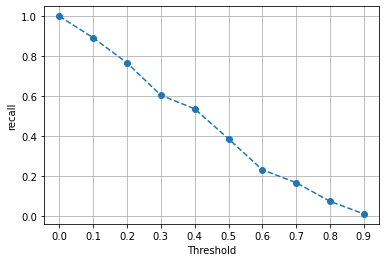

In [103]:
# plotting the various recall and threshhold values
results_df['recall'] = [recall_thresh(test_predictions[:, 1], y_test, i) for i in thresholds]
plt.plot(results_df['threshold'], results_df['recall'], '--o', label = 'recall')
plt.xticks(thresholds)
plt.xlabel('Threshold')
plt.ylabel('recall')
plt.grid();

We can clearly see the inverse relationship between thresshold and recall. So as thresshold decreases, recall increases.

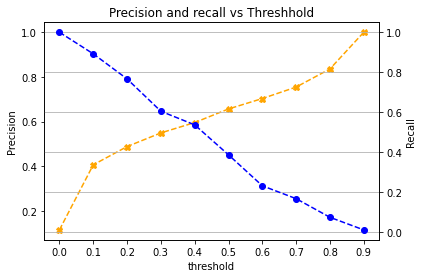

In [104]:
# Plotting various precision and recall values at different threshholds to determine the optimal thresshold
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(results_df['threshold'], results_df['precision'], '--X', label = 'precision', color='orange')
ax2.plot(results_df['threshold'], results_df['recall'],  '--o',label = 'recall', color='blue')
plt.xticks(thresholds)
ax1.set_xlabel('threshold')
ax1.set_ylabel('Precision', )
ax2.set_ylabel('Recall')
plt.grid();
plt.title('Precision and recall vs Threshhold')

plt.show()

From the above graph it is very evident that a threshold of 0.31 would give us the ideal combination of precision of recall, wherein we need to optimize for both metrics. Hence optimal metrics are as follows:

a) Threshold =0.31
b) Precision = 0.55
c) Recall = 0.55

Text(0.5, 1.0, 'Precision vs Recall')

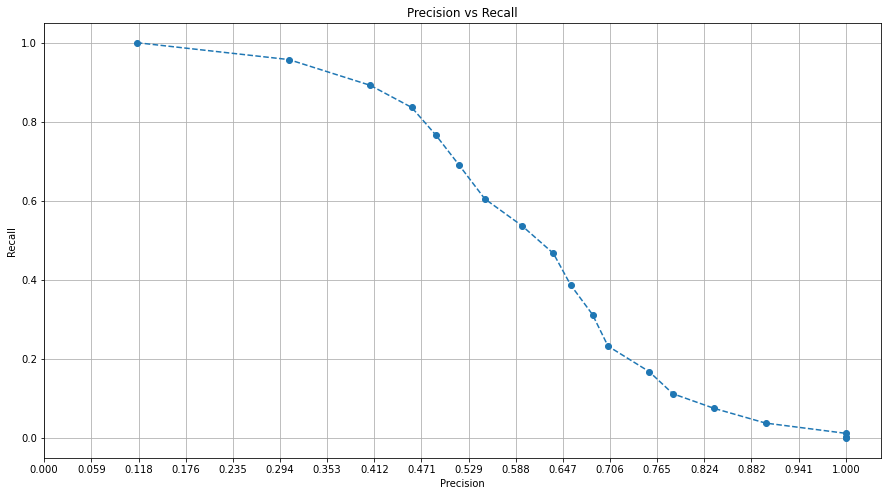

In [108]:
# Drawing a precision vs recall curve to ensure we are prediction the correct values.
precision, recall, boundaries = precision_recall_curve(y_test, test_predictions[:, 1], pos_label='yes')
plt.figure(figsize=(15,8))
plt.plot(precision, recall, '--o')
plt.xticks(boundaries);
plt.grid()
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision vs Recall')

The graph above clearly shows the inverse relationship and shows that at precision of 0.55, recall is at 0.55

For finally predicting the number of people that would carry out a term deposit and the new threshhold is as follows:

In [110]:
# Making final predictions at the thresshold (0.31) where the precision and recall is balanced
Final_predictions = np.where(knn_pipe_optimal.predict_proba(X_test)[:,1]>0.31, 'yes','no')
Final_predictions_df = pd.DataFrame(data=Final_predictions)
Final_predictions_df.rename(columns = {0:'Subscribed to a term deposit'}, inplace = True)

In [111]:
# Determining how many people my model predicted actually subscribed to a term deposit as a % of total people. 
Final_yes = Final_predictions_df.loc[Final_predictions_df['Subscribed to a term deposit'] == 'yes']
Final_yes_count = Final_yes.count()
Final_predictions_count = Final_predictions_df.count()
Conversion_prediction_percentage = (Final_yes_count/Final_predictions_count) * 100
print("Final conversion prediction percentage is",Conversion_prediction_percentage)

Final conversion prediction percentage is Subscribed to a term deposit    12.721534
dtype: float64


In [112]:
# Determining how many people actually subscribed to a term deposit as a % of total people,in the actual dataset. 
y_test_df = pd.DataFrame(data=y_test)
y_test_df.rename(columns = {'y':'Actually Subscribed to a term deposit'}, inplace = True)

Actual_yes = y_test_df.loc[y_test_df['Actually Subscribed to a term deposit'] == 'yes']
Actual_yes_count = Actual_yes.count()
y_test_df_count = y_test_df.count()
Conversion_actual_percentage = (Actual_yes_count/y_test_df_count)*100
print("Actual conversion prediction percentage is",Conversion_actual_percentage)

Actual conversion prediction percentage is Actually Subscribed to a term deposit    11.556203
dtype: float64


We can see that the predicted subscription rate is 12.72% vs an actual subscription rate of 11.56%

In [16]:
#Testing the roc grid method and determining what is best parameter in terms of nearest neighbor
roc_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(5,20, 2)}, scoring = 'roc_auc')
roc_grid.fit(X_train, y_train)
best_k_roc = roc_grid.best_params_['knn__n_neighbors']
best_k_roc

19

In [17]:
# Creating a pipeline and applying Knn with 1 neighbor in the classifier.
knn_1 = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier(n_neighbors = 1))])
knn_1.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

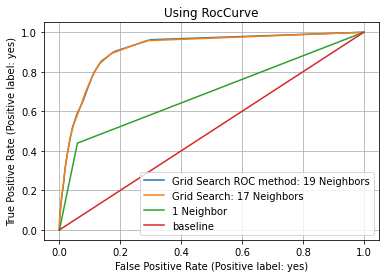

In [24]:
# Plotting the various scenarios under the ROC curve
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(roc_grid, X_test, y_test, ax = ax, label = 'Grid Search ROC method: 19 Neighbors')
RocCurveDisplay.from_estimator(knn_pipe_optimal, X_test, y_test, ax = ax, label = 'Grid Search: 17 Neighbors')
RocCurveDisplay.from_estimator(knn_1, X_test, y_test, ax = ax, label = '1 Neighbor')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurve')
plt.legend();

#### Conclusion of the above analysis ( in terms of modeling):

1) In terms of modeling and using K-nearest neighbors, the optimal hyperparameter for number of neighbors would be 17 as the Roc curve for both 17 and 19 are identical and with 17 neighbors, we would have more iterations to run through the data
2) The decision making threshhold has been set at 0.31 for Knn and the precision and recall values have been set at 0.55 as the target values. 

In [188]:
Final_DF = X_test
Final_DF = Final_DF.reset_index()
Final_DF = Final_DF.drop(['index'], axis = 1)
Final_DF['Subscribed to a term deposit']= Final_predictions_df['Subscribed to a term deposit']
Final_DF_sub = Final_DF.loc[Final_DF['Subscribed to a term deposit'] == 'yes']

In [269]:
fig = px.violin(Final_DF_sub, y="age", x = "Subscribed to a term deposit", box=True, title = 'Box plot of age with respect to deposits')
fig.show()

###### The median age of the person who subscribed for a term depost is aged at 37 years of age with the highest variation in the age group of 30 years

<Figure size 864x864 with 0 Axes>

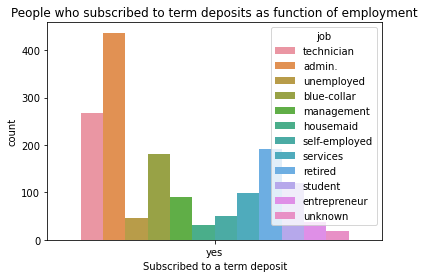

<Figure size 864x864 with 0 Axes>

In [249]:
sns.countplot(data=Final_DF_sub, x = 'Subscribed to a term deposit', hue='job')
plt.title('People who subscribed to term deposits as function of employment')
plt.figure(figsize=(12,12))

###### The most number of deposits came from individuals who were employed as admins ( ~28%) followed by those who were employed as technicians

In [216]:
fig = px.box(Final_DF_sub, x="Subscribed to a term deposit", y="age", color = 'job',title = 'Box plot of kind of jobs and age with respect to deposits')
fig.show()

###### The most number of deposits came from admis with a median age of 34 years old followed by technicians with a median age of 35. The highest median age of individuals who subscribed are retired individuals with a median age of 71 years.

Text(0.5, 1.0, 'People who subscribed to term deposits as function of education')

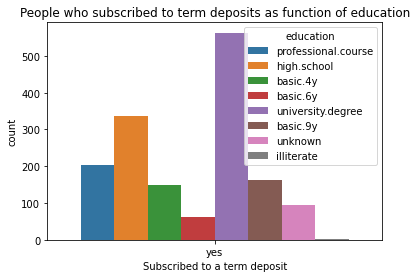

In [257]:
sns.countplot(data=Final_DF_sub, x = 'Subscribed to a term deposit', hue='education')
plt.title('People who subscribed to term deposits as function of education')

###### The most number of deposits came from individuals whi have a universtiy degree with >500 individuals (~35%) in the test dataset subscribing to term deposits. The second most from there were individuals who went to highschool with 350 individuals

In [233]:
fig = px.box(Final_DF_sub, x="Subscribed to a term deposit", y="age", color = 'education',title = 'Box plot of kind of jobs and age with respect to deposits')
fig.show()

###### The median age for individuals who subscribed to term deposits was the higest among the basic 4 year edication with a median age of 65. The median age of the highest subscription group that is university degree holders is 35 years

Text(0.5, 1.0, 'People who subscribed to term deposits as function of marital status')

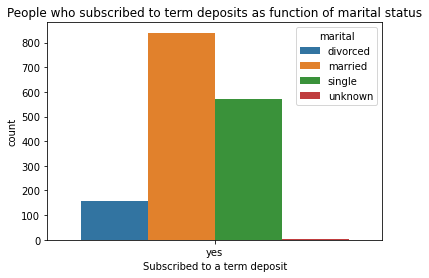

In [258]:
sns.countplot(data=Final_DF_sub, x = 'Subscribed to a term deposit', hue='marital')
plt.title('People who subscribed to term deposits as function of marital status')

###### Married individuals had the highest subscription the terms deposits (~50%) subscribing followed by single individuals(~40%).

In [214]:
fig = px.box(Final_DF_sub, x="Subscribed to a term deposit", y="age", color = 'marital',title = 'Box plot of marital status and age with respect to deposits')
fig.show()

###### The above chart indicates that for single individuals  who subscribed to term deposits the median age was 29 years old whereas for married individuals who were the highest subscribers of term deposits the median age was 44 years old. 

Text(0.5, 1.0, 'People who subscribed to term deposits as function of homeownership')

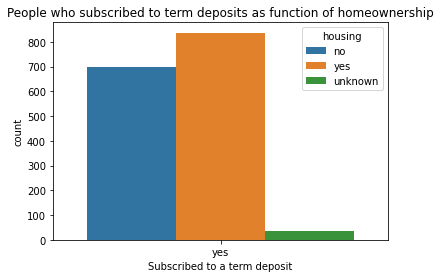

In [235]:
sns.countplot(data=Final_DF_sub, x = 'Subscribed to a term deposit', hue='housing')
plt.title('People who subscribed to term deposits as function of homeownership')

###### The above chart clearly indicates that homeownership was not a clear indicator of subscription to term deposits.

##### Questions